In [1]:
import cv2
import homcloud.interface as hc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy
from scipy.spatial import distance_matrix
import time
%matplotlib inline

In [2]:
####we choose one image in the dataset and tune bin_thres, nbd, and erase-thres
image="Slide1"
image = cv2.imread(image+'.jpg', cv2.IMREAD_UNCHANGED)
image=image[:,:,0]
####bin_thres: the threshold value for the binarization
bin_thres=150
####
BW=image>bin_thres
m=np.max(BW.shape)
BWint=np.zeros((m,m))
####the region we want to process
leftside=0
rightside=400
upperside=0
lowerside=400
####
for i in range(leftside,rightside):
    for j in range(upperside,lowerside):
        BWint[j,i]=int(BW[j,i])
I=BWint.nonzero()
BWchange=BWint.copy()
####nbd: the size of the neighborhood that is used to erase unnecessary white points
####erase_thres: the threshold value for the elimination of unnecessary white points
nbd=5
erase_thres=0
####
length=I[0].shape[0]
for k in range(0,length):
    row=I[0][k]
    column=I[1][k]
    Top=max([1,row-nbd])
    Bottom=min([m,row+nbd])
    Left=max([1,column-nbd])
    Right=min([m,column+nbd])
    whitenessmatrix=BWint[Top:Bottom,Left:Right]
    whiteness=sum(sum(whitenessmatrix))
    if whiteness<erase_thres:
        BWchange[row,column]=0
BWchangegray=BWchange*255
BWchangegrayint=BWchangegray.astype('uint8')
ret, img_binary = cv2.threshold(BWchangegrayint, 150, 255,cv2.THRESH_BINARY)

In [3]:
####make sure the cells are not erased
cv2.imshow('image',img_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
####rotate the image
height=img_binary.shape[0]
width=img_binary.shape[1]
center=(0,0)
####rot: the rotation angle of the image
rot =0
####
scale = 1.0
trans = cv2.getRotationMatrix2D(center, rot , scale)
image2 = cv2.warpAffine(img_binary, trans, (width,height))

In [5]:
cv2.imshow('image',image2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
I=image2.nonzero()
####decide the number to be multiplied in one direction. In this sample code, we can choose x or y axis.
cx=1
cy=1
####
x1=np.min(I[1])-1
y1=np.min(I[0])-1
img=image2
h=image2.shape[0]
w=image2.shape[1]
x2=x1*cx
y2=y1*cy
size_after=(int(w*cx), int(h*cy))
resized_img=cv2.resize(img, dsize=size_after)
deltax=(w/2-x1)-(resized_img.shape[1]/2-x2)
deltay=(h/2-y1)-(resized_img.shape[0]/2-y2)
framey=int(h*cy*2)
framex=int(w*cx*2)
finalimg=np.zeros((framey,framex),np.uint8)
finalimg[int(-deltay+framey/2-resized_img.shape[0]/2):int(-deltay+framey/2+resized_img.shape[0]/2),
         int(-deltax+framex/2-resized_img.shape[1]/2):int(-deltax+framex/2+resized_img.shape[1]/2)]=resized_img
finalimg=finalimg[int(finalimg.shape[0]/2-h/2):int(finalimg.shape[0]/2+h/2),int(finalimg.shape[1]/2-w/2):int(finalimg.shape[1]/2+w/2)]

In [7]:
cv2.imshow('image',finalimg)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [8]:
%%time
imgnumber=10#Enter the number of images to be processed. This number should be a multiple of "interval".
interval=1#The images are processed by intervals of this number.
start=0#Decide from which image we start tracking.
CenterList=[0]*int(np.ceil(imgnumber/interval))
ImgList=[0]*int(np.ceil(imgnumber/interval))
for number in range (0,imgnumber,interval):
    if start+number+1<10:
        img="Slide"+str(start+number+1)
    elif start+number+1<100:
        img="Slide"+str(start+number+1)
    else:
        img="Slide"+str(start+number+1)
    image = cv2.imread(img+'.jpg', cv2.IMREAD_UNCHANGED)
    image=image[:,:,0]
    BW=image>bin_thres#Changing the image into binary.
    BWint=np.zeros((m,m))
    for i in range(leftside,rightside):
        for j in range(upperside,lowerside):
            BWint[j,i]=int(BW[j,i])
    I=BWint.nonzero()
    BWchange=BWint.copy()
    length=I[0].shape[0]
    for k in range(0,length):
        row=I[0][k]
        column=I[1][k]
        Top=max([1,row-nbd])
        Bottom=min([m,row+nbd])
        Left=max([1,column-nbd])
        Right=min([m,column+nbd])
        whitenessmatrix=BWint[Top:Bottom,Left:Right]
        whiteness=sum(sum(whitenessmatrix))
        if whiteness<erase_thres:
            BWchange[row,column]=0
    BWchangegray=BWchange*255
    BWchangegrayint=BWchangegray.astype('uint8')
    ret, img_binary = cv2.threshold(BWchangegrayint, 150, 255,cv2.THRESH_BINARY)
    height=img_binary.shape[0]
    width=img_binary.shape[1]
    trans = cv2.getRotationMatrix2D(center, rot , scale)
    image2 = cv2.warpAffine(img_binary, trans, (width,height))
    I=image2.nonzero()
    if number==0:
        x1=np.min(I[1])-100
        y1=np.min(I[0])-100
    img=image2
    h=image2.shape[0]
    w=image2.shape[1]
    x2=x1*cx
    y2=y1*cy
    size_after=(int(w*cx), int(h*cy))
    resized_img=cv2.resize(img, dsize=size_after)
    deltax=(w/2-x1)-(resized_img.shape[1]/2-x2)
    deltay=(h/2-y1)-(resized_img.shape[0]/2-y2)
    framey=int(h*cy*2)
    framex=int(w*cx*2)
    finalimg=np.zeros((framey,framex),np.uint8)
    finalimg[int(-deltay+framey/2-resized_img.shape[0]/2):int(-deltay+framey/2+resized_img.shape[0]/2),
             int(-deltax+framex/2-resized_img.shape[1]/2):int(-deltax+framex/2+resized_img.shape[1]/2)]=resized_img
    finalimg=finalimg[int(finalimg.shape[0]/2-h/2):int(finalimg.shape[0]/2+h/2),int(finalimg.shape[1]/2-w/2):int(finalimg.shape[1]/2+w/2)]
    ####bd_thres: the threshold value for the boundary length
    bd_thres=50
    ####
    ret, img_binary_2 = cv2.threshold(finalimg, 150, 255,cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(img_binary_2, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)#Detecting boundaries.
    boundarynumber=0
    boundaryindex=np.array([])
    for l in range (0,len(contours)):
        if contours[l].shape[0]>bd_thres:
            boundarynumber=boundarynumber+1
            boundaryindex=np.append(boundaryindex,l)
    boundaries=np.zeros((m,m,boundarynumber))
    for t in range (0,boundarynumber):
        for u in range (0,contours[int(boundaryindex[t])].shape[0]):
            boundaries[contours[int(boundaryindex[t])][u][0][0],contours[int(boundaryindex[t])][u][0][1],t]=1
    boundary_death_positions=np.array([])
    ####PH_thres: the threshold value for persistent homological figure detection
    PH_threshold=14
    ####
    for v in range (0,boundarynumber):
        pointcloudflat=np.array([])
        boundary_image=boundaries[:,:,v]>0
        h,w=boundaries[:,:,v].shape
        for j in range (0,h):
            for l in range (0,w):
                if boundaries[j,l,v]>0:
                    pointcloudflat=np.append(pointcloudflat,[j,l])
        pointcloud=np.reshape(pointcloudflat,(int(len(pointcloudflat)/2),2))
        hc.PDList.from_alpha_filtration(pointcloud,save_to="pointcloud.pdgm",save_boundary_map=True,no_squared=True)#Calculating persistent homology.
        pdlist = hc.PDList("pointcloud.pdgm")
        pd = pdlist.dth_diagram(1)
        pairs=pd.pairs()
        for w in range (0,len(pairs)):
            if pairs[w].death_time()>PH_threshold:
                P=pairs[w].death_position#################ここを重心から外心に変えた。
                x=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[1][1]-P[2][1])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[2][1]-P[0][1])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[0][1]-P[1][1]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
                y=((P[0][0]*P[0][0]+P[0][1]*P[0][1])*(P[2][0]-P[1][0])+(P[1][0]*P[1][0]+P[1][1]*P[1][1])*(P[0][0]-P[2][0])+(P[2][0]*P[2][0]+P[2][1]*P[2][1])*(P[1][0]-P[0][0]))/(2*(P[0][0]*(P[1][1]-P[2][1])+P[1][0]*(P[2][1]-P[0][1])+P[2][0]*(P[0][1]-P[1][1])))
                boundary_death_positions=np.append(boundary_death_positions,[x,y])
    positionnumber=int(len(boundary_death_positions)/2)
    center_position=np.reshape(boundary_death_positions,(positionnumber,2))
    ImgList[int(np.ceil((number+1)/interval)-1)]=finalimg
    CenterList[int(np.ceil((number+1)/interval)-1)]=center_position
    print(start+number+1, "DONE")

1 DONE
2 DONE
3 DONE
4 DONE
5 DONE
6 DONE
7 DONE
8 DONE
9 DONE
10 DONE
Wall time: 4.28 s


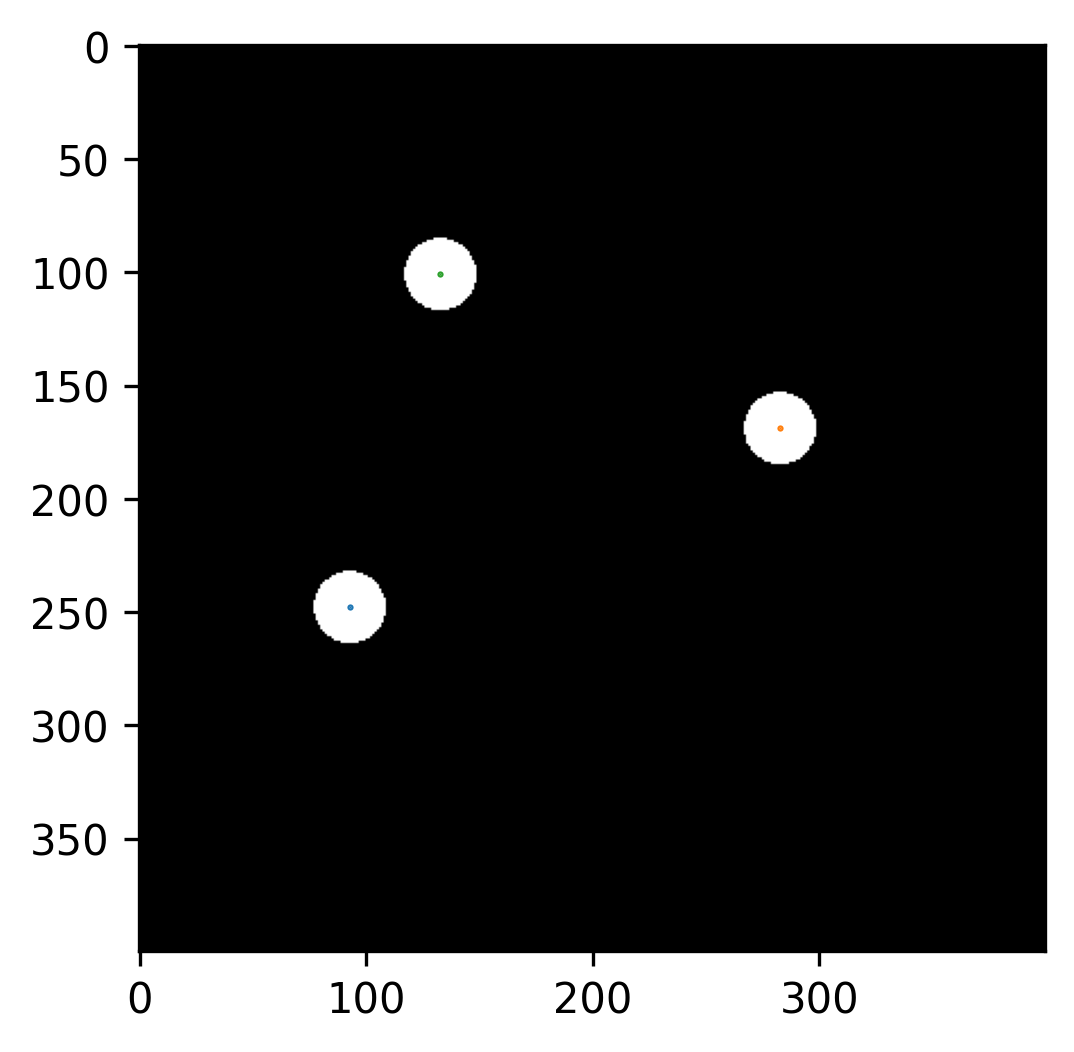

In [9]:
###The result for the first image.
img_r=cv2.cvtColor(ImgList[0], cv2.COLOR_BGR2RGB)
fig=plt.figure(dpi=300)
for SCL in range (0,len(CenterList[0])):
    plt.plot(CenterList[0][SCL][0],CenterList[0][SCL][1], marker='.', markersize=1)
    plt.imshow(img_r)
plt.show()

In [10]:
for index in range (0,len(CenterList[0])):
    print(index,CenterList[0][index])

0 [ 92.60240964 247.68674699]
1 [282.58536585 168.63902439]
2 [132.60240964 100.68674699]


In [11]:
number=input("Please enter the number of points: ")
number=int(number)
SelectedCenterList=[0]*int(np.ceil(imgnumber/interval))
for inputnum in range (0,number):
    index=input("Please enter the index of a point: ")
    index=int(index)
    if inputnum==0:
        SelectedCenterList[0]=CenterList[0][index]
    else:
        SelectedCenterList[0]=np.append(SelectedCenterList[0],CenterList[0][index])

Please enter the number of points: 3
Please enter the index of a point: 2
Please enter the index of a point: 0
Please enter the index of a point: 1


In [12]:
for p in range (0,int(np.ceil(imgnumber/interval)-1)):
    SelectedCenterData=SelectedCenterList[p].copy()
    SelectedCenterData=np.reshape(SelectedCenterData,(int(len(SelectedCenterData)/2),2))
    for q in range (0,len(SelectedCenterData)):
        Difference=CenterList[p+1]-SelectedCenterData[q]
        SquareDifference=np.square(Difference)
        SquareDistance=np.sum(SquareDifference,axis=1)
        MinIndex=np.argmin(SquareDistance)
        if q==0:
            SelectedCenterList[p+1]=CenterList[p+1][MinIndex]
        else:
            SelectedCenterList[p+1]=np.append(SelectedCenterList[p+1],CenterList[p+1][MinIndex])

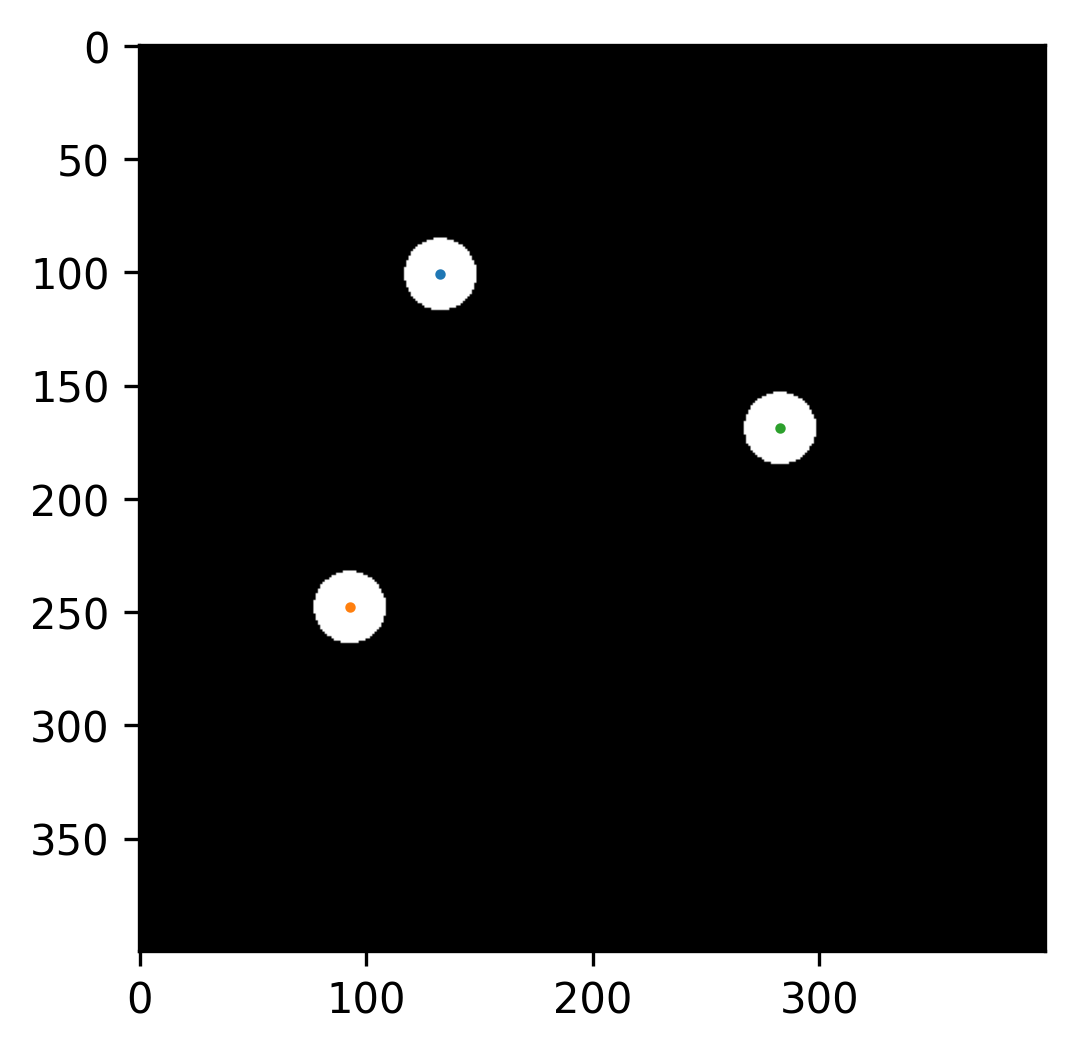

If OK enter 0. If not enter 1: 0


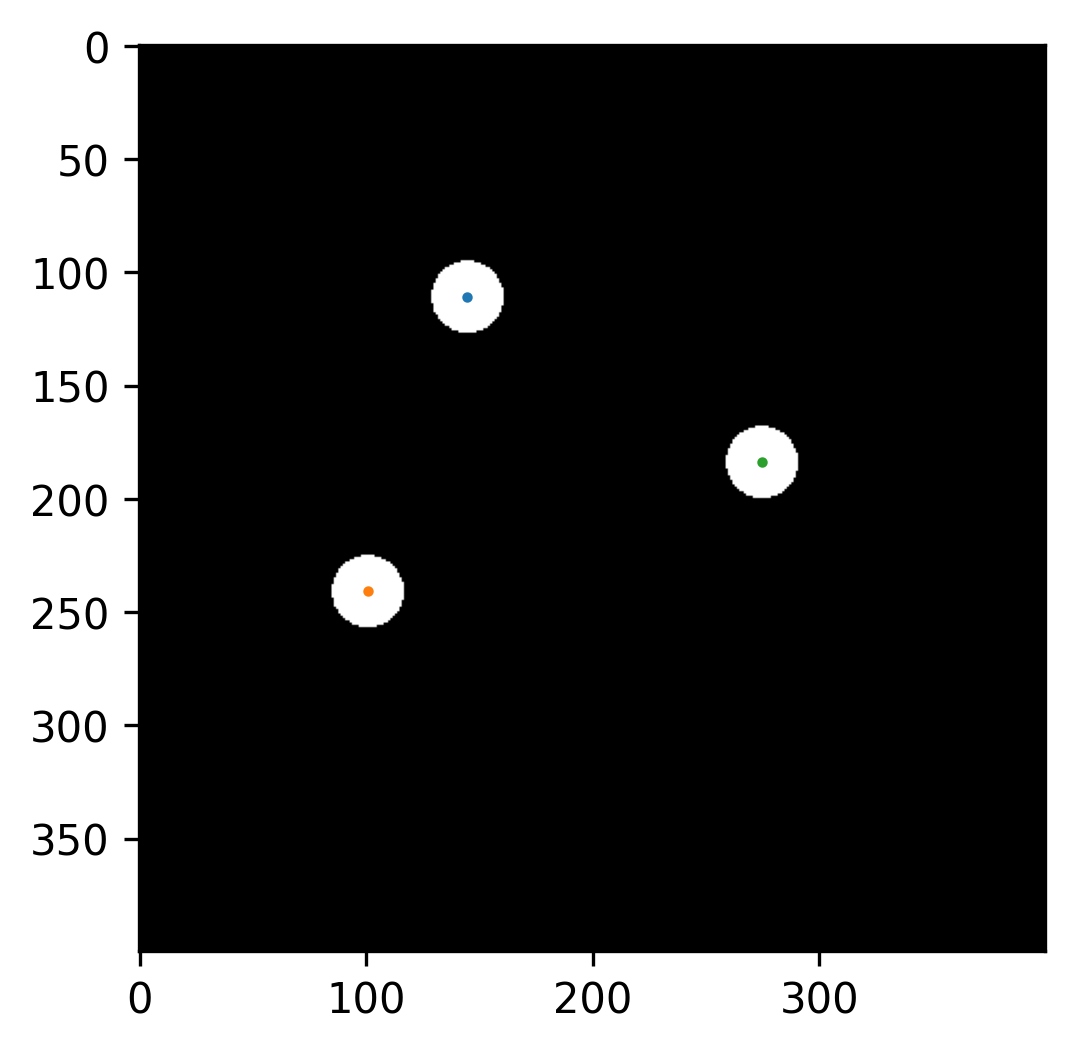

If OK enter 0. If not enter 1: 0


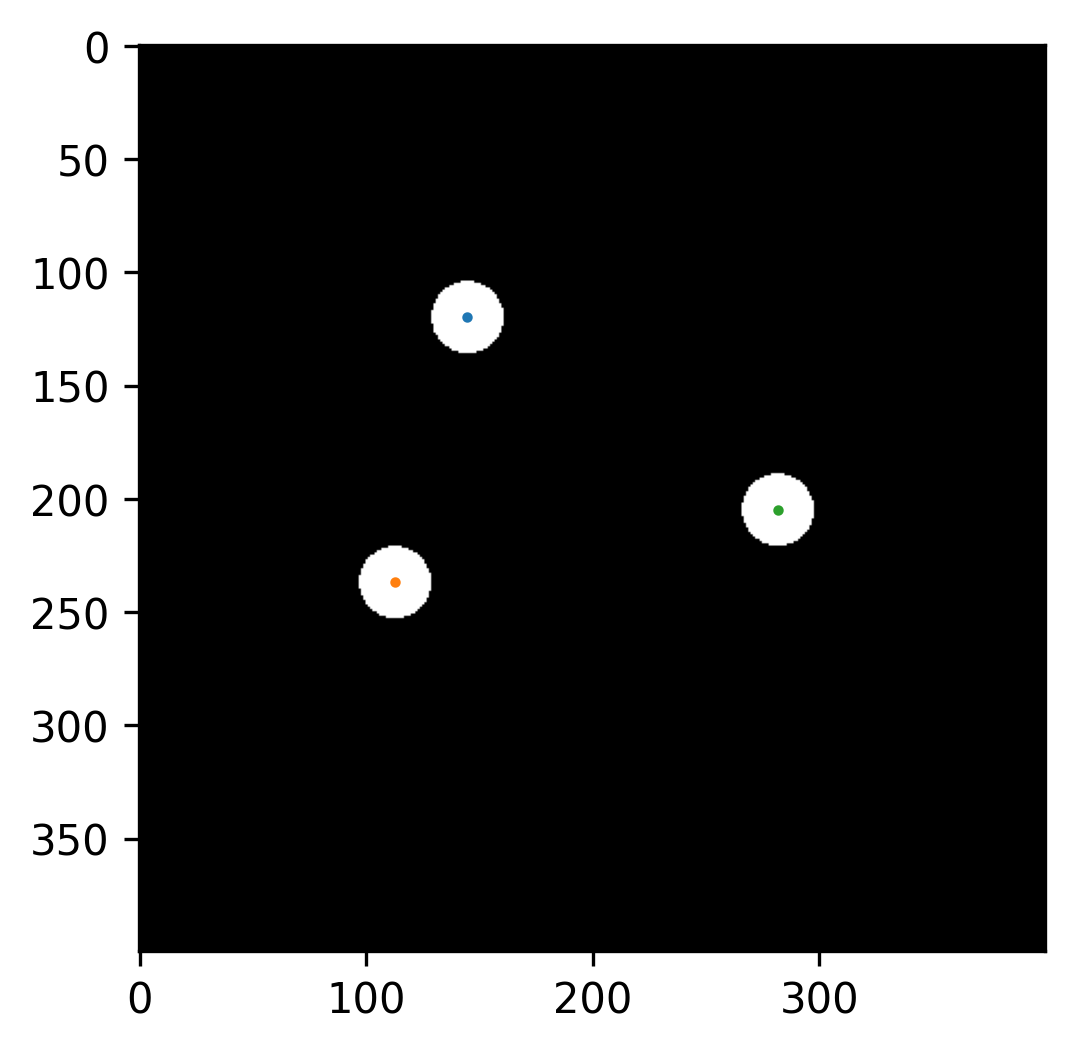

If OK enter 0. If not enter 1: 0


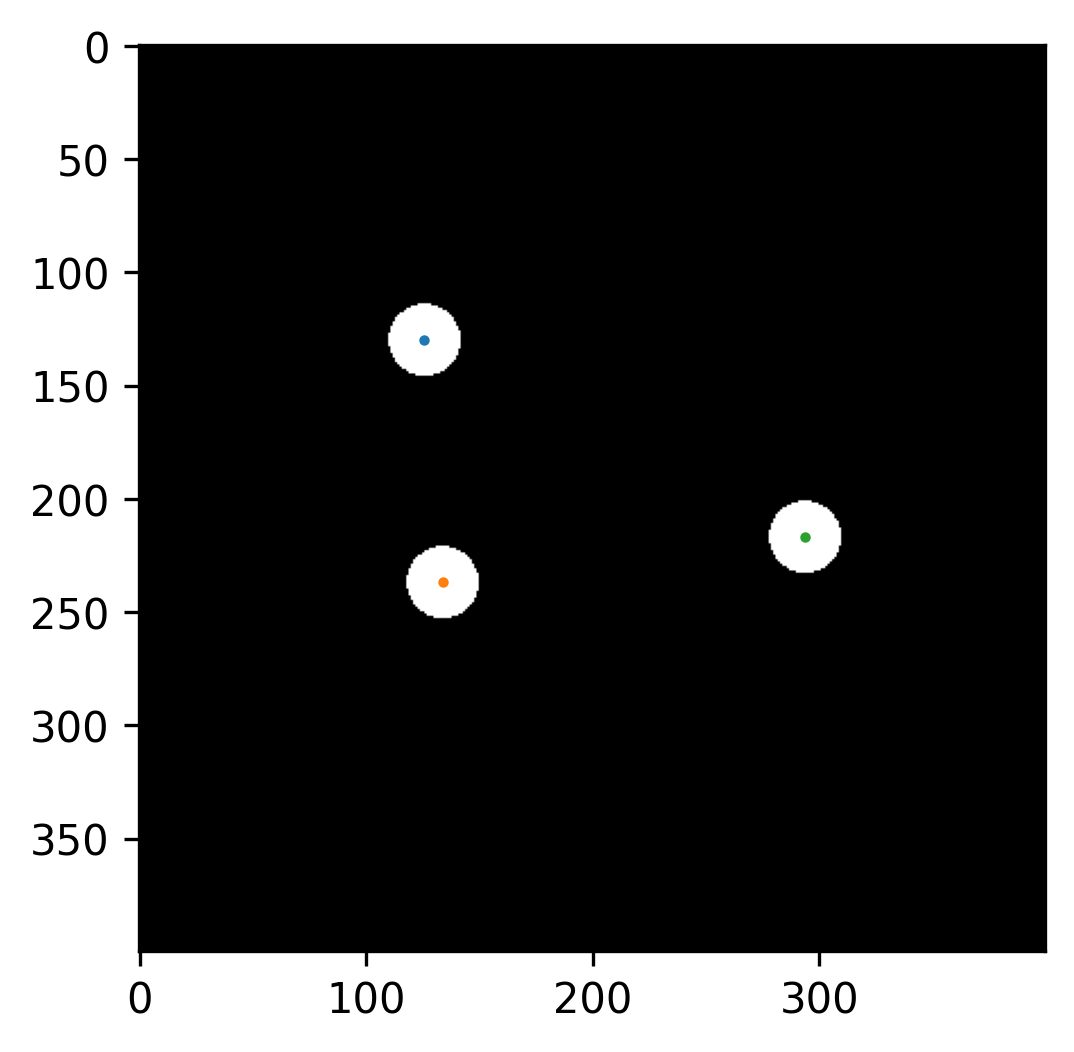

If OK enter 0. If not enter 1: 0


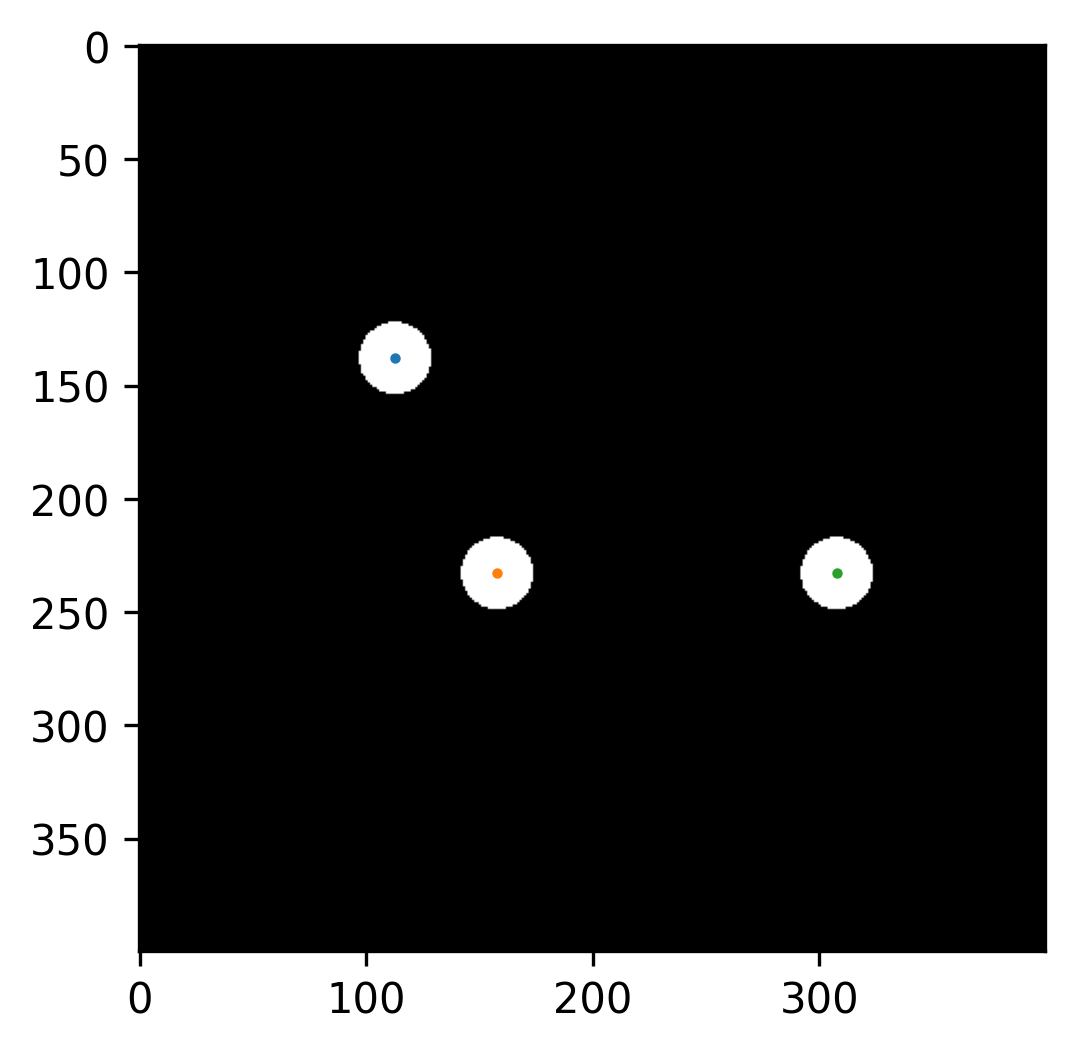

If OK enter 0. If not enter 1: 0


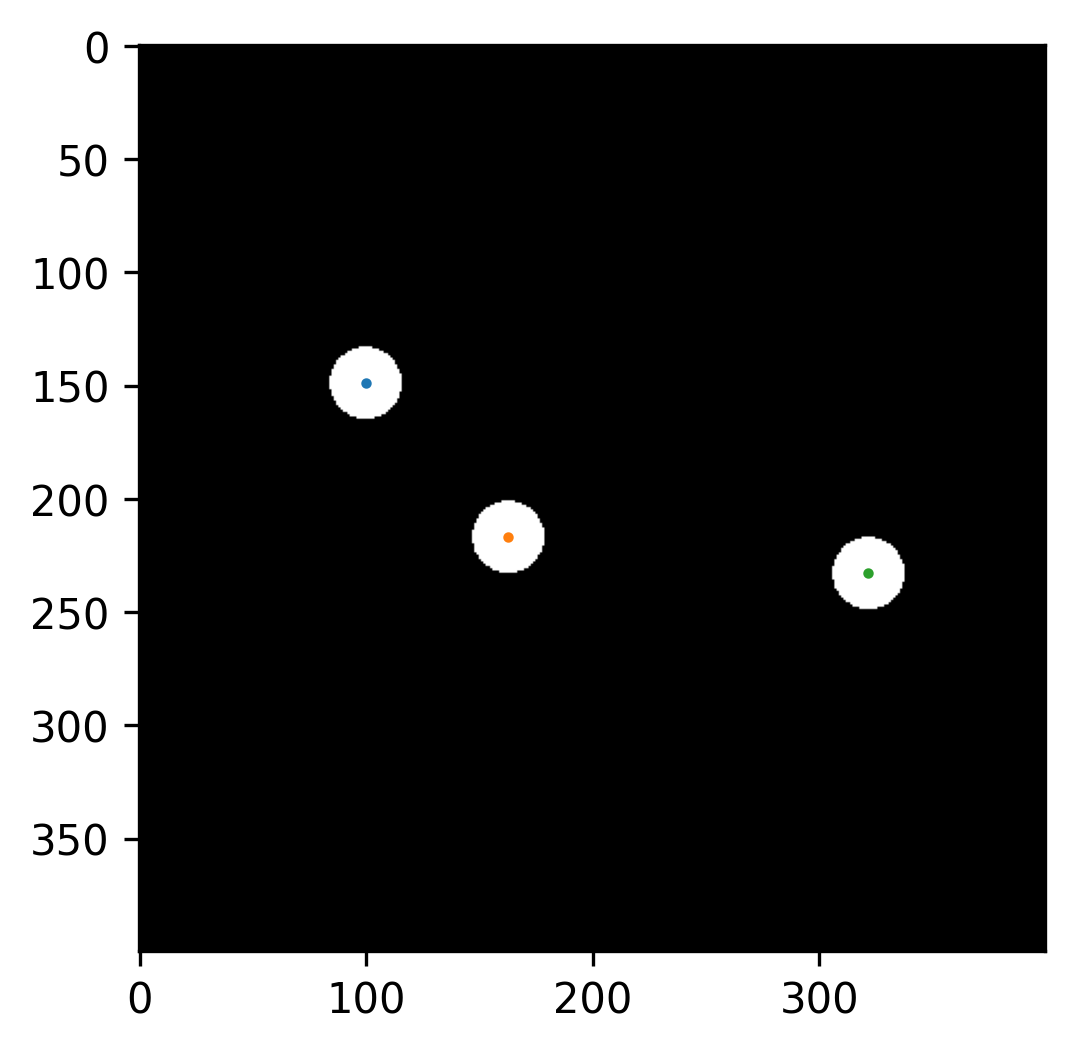

If OK enter 0. If not enter 1: 0


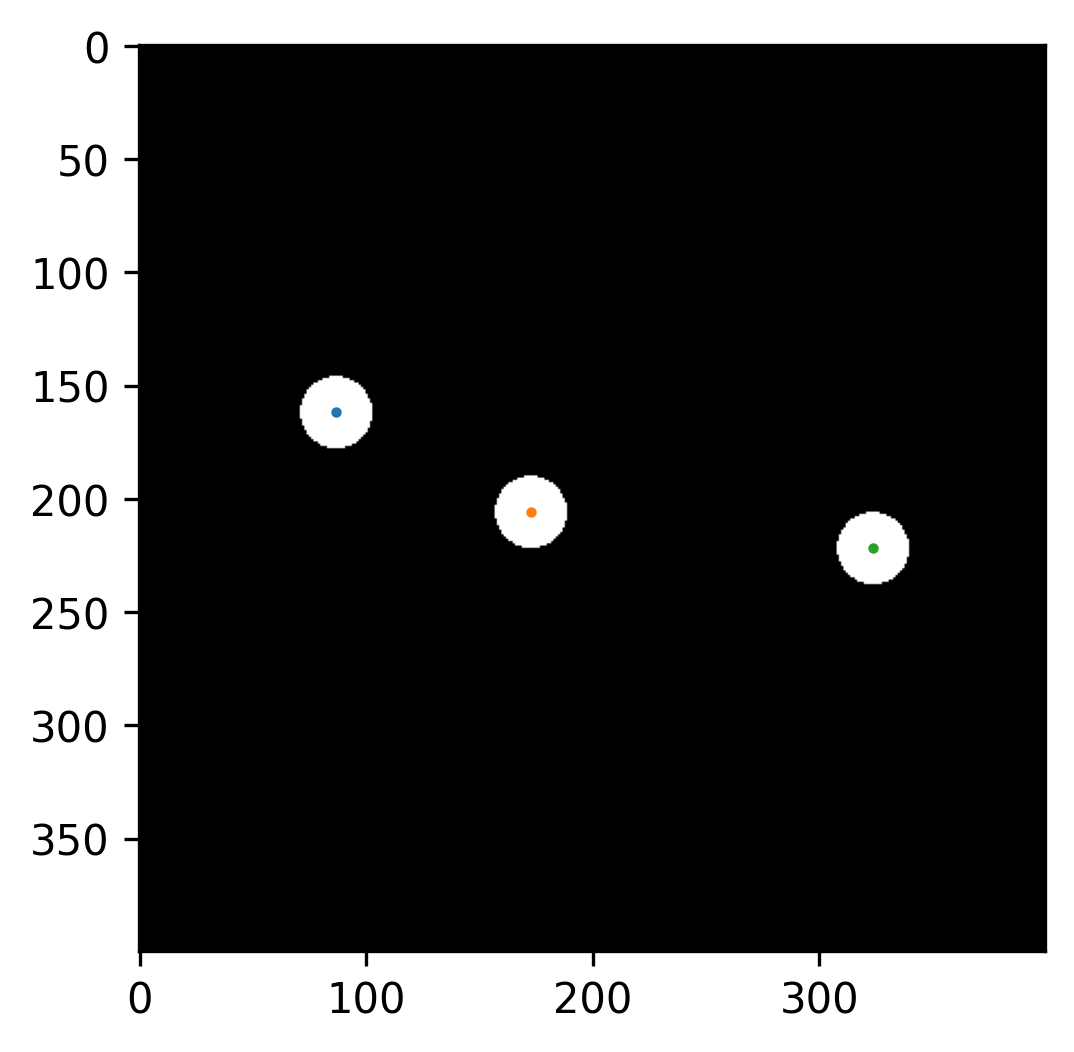

If OK enter 0. If not enter 1: 0


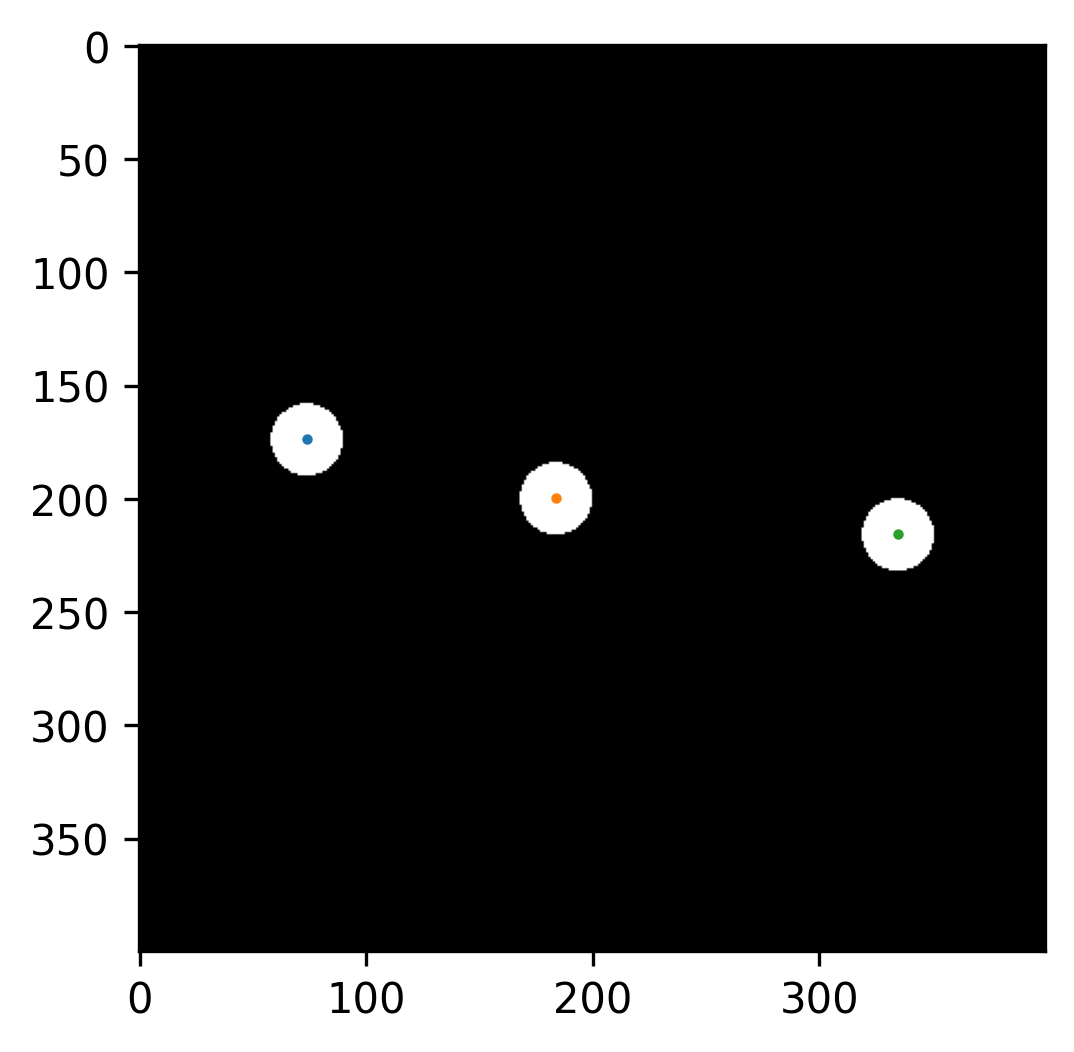

If OK enter 0. If not enter 1: 0


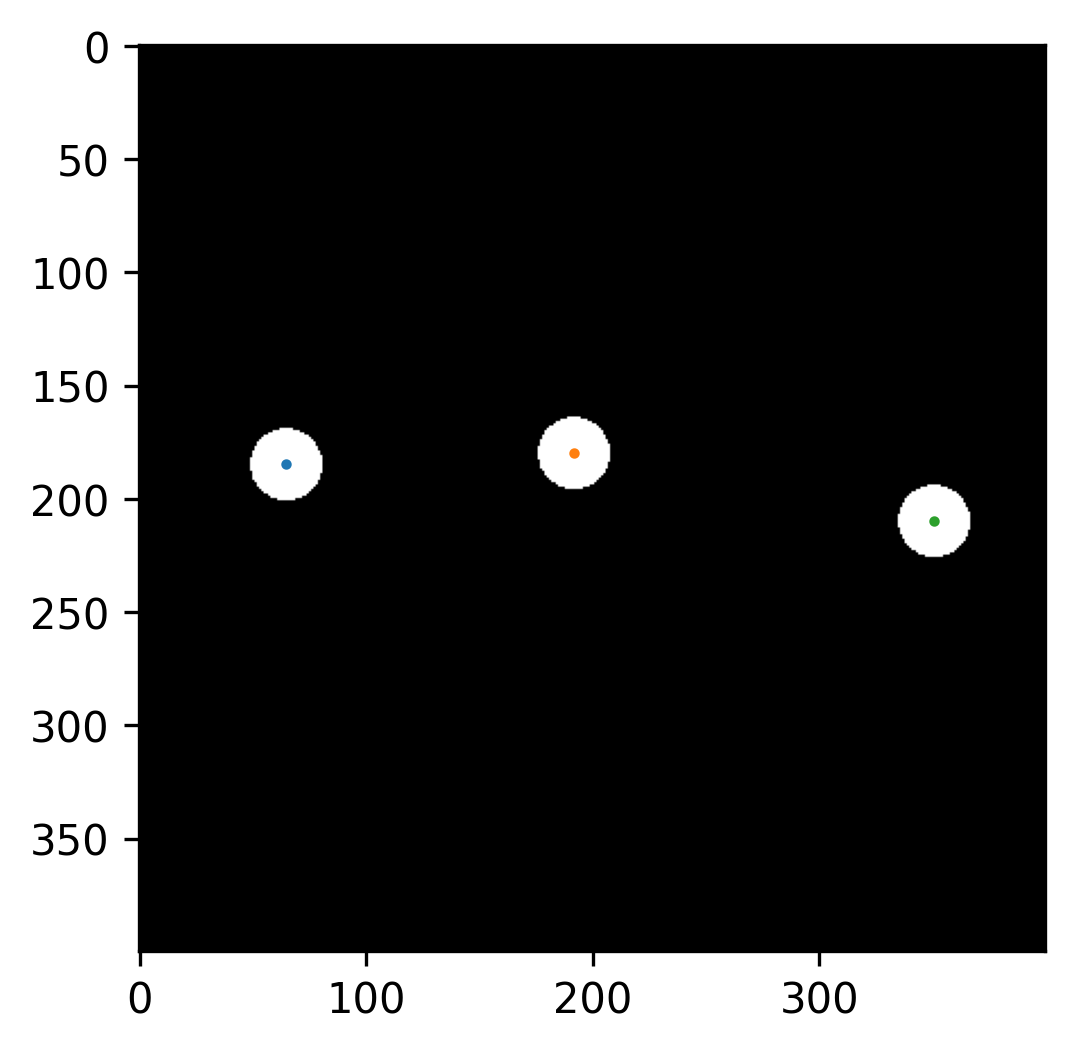

If OK enter 0. If not enter 1: 0


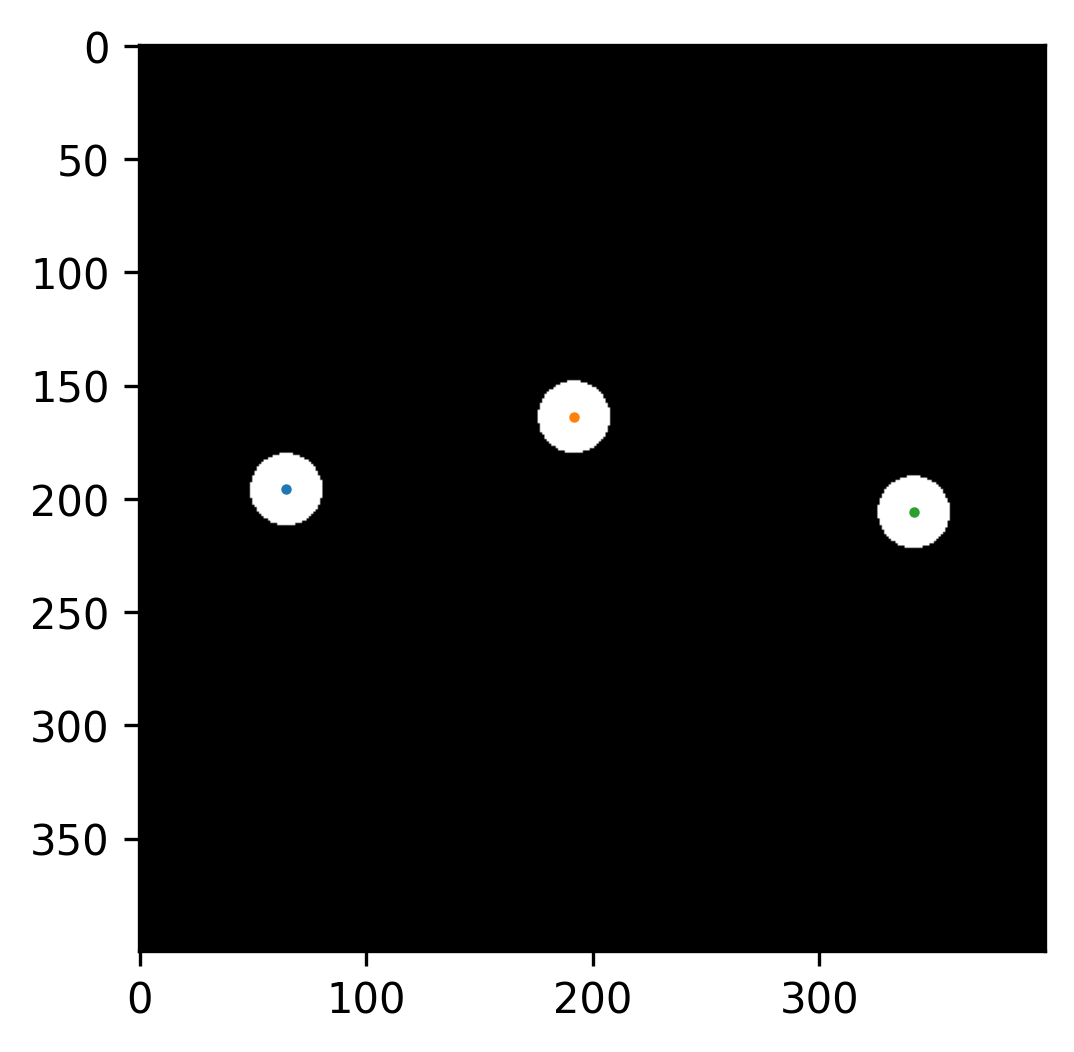

If OK enter 0. If not enter 1: 0


In [13]:
for check in range (0,int(np.ceil(imgnumber/interval))):
    fig=plt.figure(dpi=300)
    img_r = cv2.cvtColor(ImgList[check], cv2.COLOR_BGR2RGB)
    for SCL in range (0,int(len(SelectedCenterList[check])/2)):
        plt.plot(SelectedCenterList[check][2*SCL],SelectedCenterList[check][2*SCL+1], marker='.', markersize=3)
        plt.imshow(img_r)
    plt.show()
    v=input("If OK enter 0. If not enter 1: ")
    w=int(v)
    if w==1:
        print('Current Points')
        print(SelectedCenterList[check])
        print('please choose alternative indices of the points from below')
        for listindex in range (0,len(CenterList[check])):
            print(listindex,CenterList[check][listindex])
        for r in range (0,number):
            x=input("Please enter the index of a point: ")
            x=int(x)
            if r==0:
                SelectedCenterList[check]=CenterList[check][x]
            else:
                SelectedCenterList[check]=np.append(SelectedCenterList[check],CenterList[check][x])
        for p in range (check,int(np.ceil(imgnumber/interval)-1)):
            SelectedCenterData=SelectedCenterList[p].copy()
            SelectedCenterData=np.reshape(SelectedCenterData,(int(len(SelectedCenterData)/2),2))
            for q in range (0,len(SelectedCenterData)):
                Difference=CenterList[p+1]-SelectedCenterData[q]
                SquareDifference=np.square(Difference)
                SquareDistance=np.sum(SquareDifference,axis=1)
                MinIndex=np.argmin(SquareDistance)
                if q==0:
                    SelectedCenterList[p+1]=CenterList[p+1][MinIndex]
                else:
                    SelectedCenterList[p+1]=np.append(SelectedCenterList[p+1],CenterList[p+1][MinIndex])

In [14]:
SelectedCenterList

[array([132.60240964, 100.68674699,  92.60240964, 247.68674699,
        282.58536585, 168.63902439]),
 array([144.60240964, 110.68674699, 100.60240964, 240.68674699,
        274.60240964, 183.68674699]),
 array([144.60240964, 119.68674699, 112.60240964, 236.68674699,
        281.60240964, 204.68674699]),
 array([125.60240964, 129.68674699, 133.60240964, 236.68674699,
        293.63333333, 216.63333333]),
 array([112.60240964, 137.68674699, 157.63333333, 232.63333333,
        307.60240964, 232.68674699]),
 array([ 99.60240964, 148.68674699, 162.58536585, 216.63902439,
        321.60240964, 232.68674699]),
 array([ 86.60240964, 161.68674699, 172.60240964, 205.68674699,
        323.60240964, 221.68674699]),
 array([ 73.60240964, 173.68674699, 183.60240964, 199.68674699,
        334.60240964, 215.68674699]),
 array([ 64.60240964, 184.68674699, 191.60240964, 179.68674699,
        350.60240964, 209.68674699]),
 array([ 64.55347594, 195.6657754 , 191.60240964, 163.68674699,
        341.602409

In [15]:
Groundtruth=np.loadtxt("modeldata1final.txt")

In [16]:
SelectedCenterListarr=np.array(SelectedCenterList)
delta=SelectedCenterListarr-Groundtruth
sqdelta=delta**2
sqdeltaflat=sqdelta.flatten()
sqdeltareshape=np.reshape(sqdeltaflat,(int(len(sqdeltaflat)/2),2))
sqdeltasum=np.sum(sqdeltareshape,axis=1)
distance=np.sqrt(sqdeltasum)

In [17]:
np.mean(distance)

0.7409994364267238

In [18]:
np.std(distance)

0.3961240339872795